In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import matplotlib as mplt
PATH_REGEX_CSV = 'marked_pdf/regex_csv/'
PATH_PREDICT_CSV = 'marked_pdf/predict_csv/'

In [2]:
def foo(d, path):
    for f in os.listdir(path):
        d[f] = pd.read_csv(path+f)

csv_regex = {}
csv_pred = {}
foo(csv_regex, PATH_REGEX_CSV), foo(csv_pred, PATH_PREDICT_CSV)
ks = list(csv_regex.keys())
ks

['DODF Seção2 04-11-2002.csv',
 'DODF 001 02-01-2019 INTEGRA.csv',
 'DODF 228 03-12-2018 INTEGRA.csv',
 'DODF Seção 1 29-10-2001.csv',
 'DODF Seção 1 1-11-2001.csv',
 'DODF 064 03-04-2020 INTEGRA.csv',
 'DODF 062 02-04-2019 INTEGRA.csv',
 'DODF Seção 2 1-11-2001.csv',
 'DODF Seção1 04-11-2002.csv',
 'DODF 015 22-01-2019 INTEGRA.csv',
 'DODF 063 02-05-2020 EDICAO EXTRA.csv',
 'DODF 081 30-04-2020 INTEGRA.csv']

In [4]:
%%time
csv_common = {}
csv_true_common = {}

csv_diff = {}
for k in csv_regex:
    df = csv_regex[k]
    csv_common[k] = df[csv_regex[k].y == csv_pred[k].y]
    csv_true_common[k] = df[csv_regex[k].y & csv_pred[k].y]
    csv_diff[k] = df[csv_regex[k].y != csv_pred[k].y]

CPU times: user 37 ms, sys: 3.26 ms, total: 40.2 ms
Wall time: 50.2 ms


CPU times: user 31 ms, sys: 983 µs, total: 32 ms
Wall time: 37.4 ms


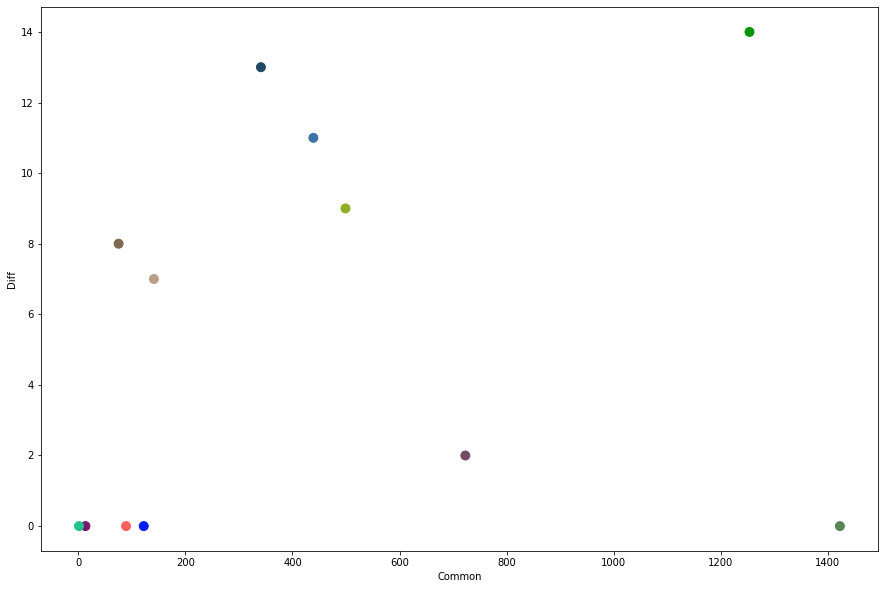

In [5]:
%%time

x = [i.shape[0] for i in csv_common.values()]
y = [i.shape[0] for i in csv_diff.values()]
cmap= mplt.colors.get_named_colors_mapping()

plt.figure(1, figsize=(15, 10))
plt.ylabel('Diff')
plt.xlabel('Common')
plt.scatter(x, y, c=list(cmap)[150:150+len(x)], s=80.);

CPU times: user 19.9 ms, sys: 5.12 ms, total: 25.1 ms
Wall time: 21.2 ms


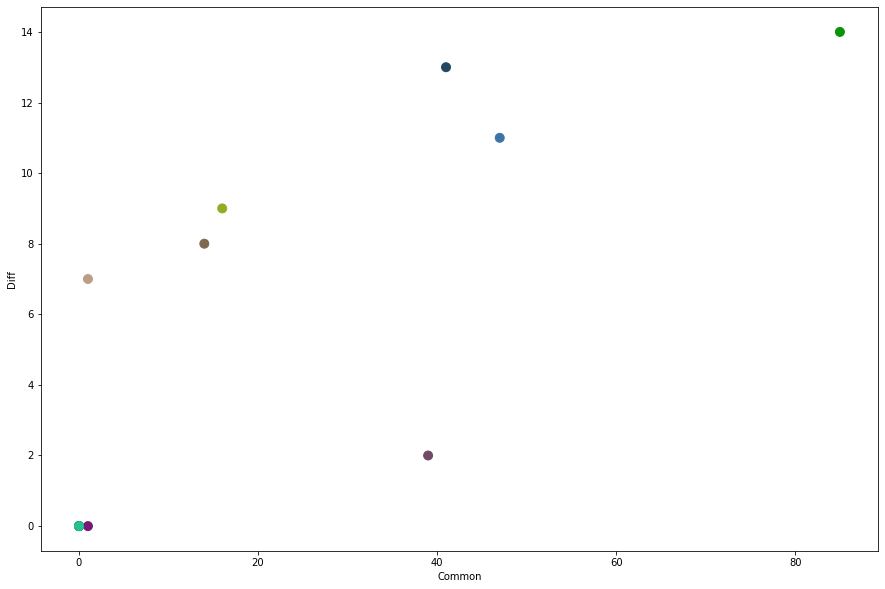

In [6]:
%%time

x = [i.shape[0] for i in csv_true_common.values()]
y = [i.shape[0] for i in csv_diff.values()]
cmap= mplt.colors.get_named_colors_mapping()

plt.figure(1, figsize=(15, 10))
plt.ylabel('Diff')
plt.xlabel('Common')
plt.scatter(x, y, c=list(cmap)[150:150+len(x)], s=80.);